In [1]:
import pandas as pd
from datetime import datetime
from zoe import cases, query, pickle, find_previous, plot_study, plot_study_evolution, maplotlib_plot_map as plot_map

In [64]:
uk_active_cases = query("SELECT * FROM uk_active_cases", index='date')
uk_active_cases.index = pd.to_datetime(uk_active_cases.index)

In [65]:
curr_date = uk_active_cases.index.max()
print(pickle(uk_active_cases, 'uk_active_cases', curr_date))

/Users/chris/Downloads/zoe_uk_active_cases_2020-09-08_2020-09-09-18-54.pickle


In [66]:
prev_date, prev_uk_active_cases = find_previous(curr_date)

/Users/chris/Downloads/zoe_uk_active_cases_2020-09-06_2020-09-09-18-54.pickle


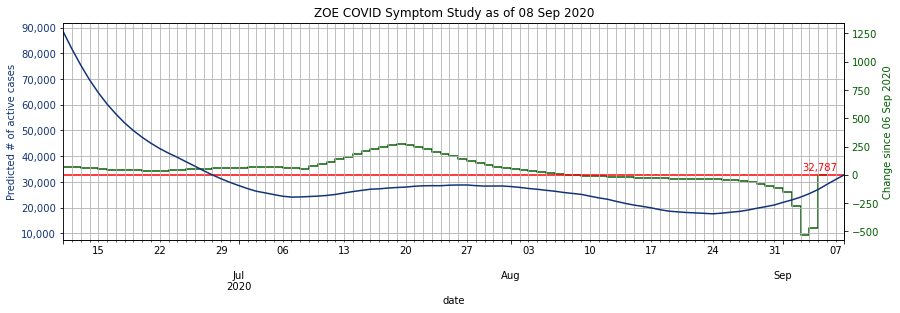

In [67]:
plot_study(curr_date, prev_date, uk_active_cases, prev_uk_active_cases)

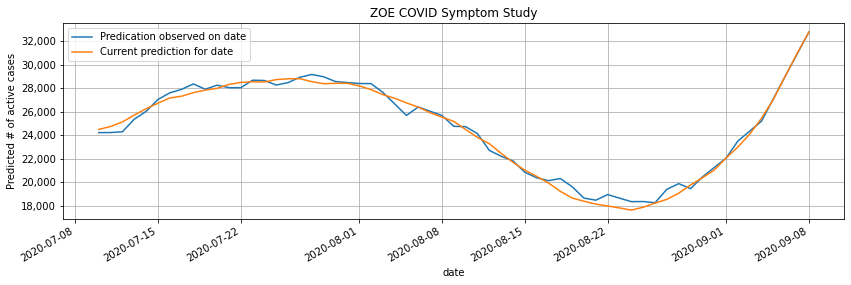

In [68]:
plot_study_evolution(curr_date)

In [69]:
prevalence_map = query("SELECT * FROM prevalence_map")
prevalence_map['percentage'] = prevalence_map['percentage'].astype(float)
prevalence_map

,cartodb_id,the_geom,the_geom_webmercator,objectid,lad16cd,lad16nm,lad16nmw,bng_e,bng_n,long,...,cases_pm,percentage,discrete_percentage,discrete_cases_pm,percentage_string,cases_pm_string,cases_string,data_status,country,region
0,3520,0103000020E610000001000000C4010000AD9CD15F9CE2...,0103000020110F000001000000C401000034EC1A1775E3...,1,E06000001,Hartlepool,None,447157,531476,-1.27023,...,NaN,NaN,-1.00,-1,Not enough contributors,Not enough contributors,Not enough contributors,05:00:02 09-09-2020,England,North East
1,3532,0106000020E61000000300000001030000000100000004...,0106000020110F00000300000001030000000100000004...,13,E06000013,North Lincolnshire,None,497798,410996,-0.52410,...,770.313,0.077031,0.05,500,0.1 %,770,59,05:00:02 09-09-2020,England,Yorkshire and The Humber
2,3521,0106000020E61000000200000001030000000100000013...,0106000020110F00000200000001030000000100000013...,2,E06000002,Middlesbrough,None,451141,516887,-1.21099,...,1285.15,0.128515,0.10,1000,0.1 %,1285,61,05:00:02 09-09-2020,England,North East
3,3522,0106000020E61000000200000001030000000100000006...,0106000020110F00000200000001030000000100000006...,3,E06000003,Redcar and Cleveland,None,464359,519597,-1.00611,...,1025.95,0.102595,0.10,1000,0.1 %,1026,60,05:00:02 09-09-2020,England,North East
4,3523,0106000020E61000000200000001030000000100000025...,0106000020110F00000200000001030000000100000025...,4,E06000004,Stockton-on-Tees,None,444937,518183,-1.30669,...,880.941,0.088094,0.05,500,0.1 %,881,84,05:00:02 09-09-2020,England,North East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,3889,0106000020E610000002000000010300000001000000B0...,0106000020110F000002000000010300000001000000B0...,389,W06000022,Newport,Casnewydd,337897,187433,-2.89769,...,1305.53,0.130553,0.10,1000,0.1 %,1306,109,05:00:02 09-09-2020,Wales,Wales
387,3890,0103000020E6100000010000006D1000003E242470162E...,0103000020110F0000010000006D10000075DF530DAA62...,390,W06000023,Powys,Powys,302328,273254,-3.43533,...,1317.38,0.131738,0.10,1000,0.1 %,1317,120,05:00:02 09-09-2020,Wales,Wales
388,3891,0103000020E61000000100000060010000CAAE459CF9AC...,0103000020110F000001000000600100003FE916C4D9A7...,391,W06000024,Merthyr Tydfil,Merthyr Tudful,305916,206424,-3.36425,...,1450.62,0.145062,0.10,1000,0.1 %,1451,49,05:00:02 09-09-2020,Wales,Wales
389,3892,0103000020E610000001000000C0000000CA21EFF2CDF8...,0103000020110F000001000000C0000000DEAADBECED86...,325,E09000032,Wandsworth,None,525152,174137,-0.20021,...,807.666,0.080767,0.05,500,0.1 %,808,203,05:00:02 09-09-2020,England,London


In [70]:
for_date, = prevalence_map['data_status'].unique()
print(pickle(prevalence_map, 'prevalence_map', datetime.strptime(for_date, '%H:%M:%S %d-%m-%Y')))

/Users/chris/Downloads/zoe_prevalence_map_2020-09-09_2020-09-09-18-54.pickle


In [71]:
prevalence_map[['lad16nm', 'lad16cd', 'percentage']].sort_values('percentage', ascending=False)[:10]

,lad16nm,lad16cd,percentage
347,Belfast,N09000003,0.564761
353,Lisburn and Castlereagh,N09000007,0.431832
184,Glasgow City,S12000046,0.336367
179,North Lanarkshire,S12000044,0.285323
357,Ards and North Down,N09000011,0.283533
295,Rochdale,E08000005,0.244065
302,Liverpool,E08000012,0.241176
291,Bolton,E08000001,0.222139
151,East Renfrewshire,S12000011,0.210090
183,East Dunbartonshire,S12000045,0.200280


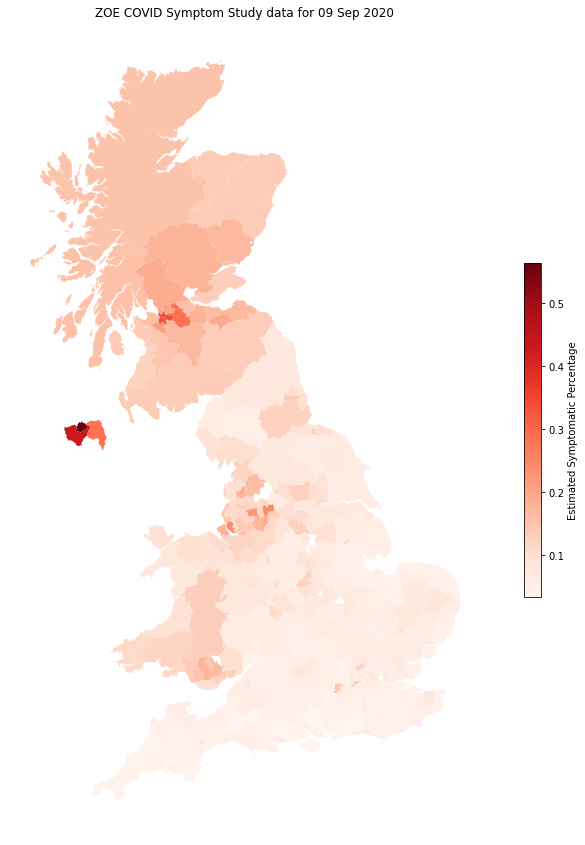

In [72]:
plot_map()